## K-Nearest Neighbor Exercises

In [2]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

# Data acquisition
from pydataset import data

# Data modeling
from model import map_setosa_knn, train_validate_test_split

#Data acquisition and preparation
import acquire as ac
import prepare as pr

Continue working in your `model.ipynb` file with the ```titanic``` dataset.

1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

2. Evaluate your results using the model score, confusion matrix, and classification report.

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

4. Run through steps 2-4 setting k to 10

5. Run through setps 2-4 setting k to 20

6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

7. Which model performs best on our out-of-sample data from validate?

-------

Once you have completed work on the titanic dataset, try building some knn models with your telco data.

In [3]:
titanic = ac.get_titanic_data()

In [4]:
X_train, X_validate, X_test, y_train, y_validate, y_test = pr.prep_titanic_6(titanic)

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      498 non-null    float64
 1   sibsp                    498 non-null    int64  
 2   parch                    498 non-null    int64  
 3   fare                     498 non-null    float64
 4   alone                    498 non-null    int64  
 5   sex_male                 498 non-null    uint8  
 6   class_Second             498 non-null    uint8  
 7   class_Third              498 non-null    uint8  
 8   embark_town_Queenstown   498 non-null    uint8  
 9   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 25.8 KB


In [5]:
#with all columns knn with n_neighbors = 5 performed only with 79% of accuracy
#i drop columns that are not significantly valuable to increase the algorithm performance 
X_train.drop(columns=['age', 'sibsp', 'parch'], inplace=True)
X_validate.drop(columns=['age', 'sibsp', 'parch'], inplace=True)
X_test.drop(columns=['age', 'sibsp', 'parch'], inplace=True)

In [35]:
#Fit a K-Nearest Neighbors classifier to your training sample and 
#transform (i.e. make predictions on the training sample)
knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [36]:
knn5.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
#predition
y_pred = knn5.predict(X_train)

In [38]:
pd.DataFrame(y_pred, y_train).T

survived,0,1,0,1,1,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,1
0,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0


In [39]:
#estimate probability
y_pred_proba = knn5.predict_proba(X_train)
pd.DataFrame(y_pred_proba, columns=[1, 0]).T

,0,1,2,3,4,5,6,7,8,9,...,488,489,490,491,492,493,494,495,496,497
1,1.0,0.6,0.8,0.0,0.4,0.6,0.8,0.8,1.0,1.0,...,0.8,0.2,0.2,1.0,0.4,1.0,0.8,0.8,0.4,0.8
0,0.0,0.4,0.2,1.0,0.6,0.4,0.2,0.2,0.0,0.0,...,0.2,0.8,0.8,0.0,0.6,0.0,0.2,0.2,0.6,0.2


***Evaluate model***

In [40]:
#Evaluate your results using the model score, confusion matrix, and classification report.
cm5 = confusion_matrix(y_train, y_pred, labels=knn5.classes_)

In [41]:
cm5

array([[269,  38],
       [ 52, 139]])

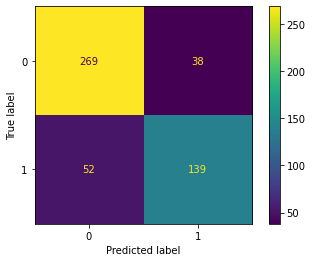

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm5,
                          display_labels=knn5.classes_)
disp.plot();

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support

In [43]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       307
           1       0.79      0.73      0.76       191

    accuracy                           0.82       498
   macro avg       0.81      0.80      0.81       498
weighted avg       0.82      0.82      0.82       498



In [148]:
count_scores(cm5, 'KNN-5')

,Score Name,KNN-5
0,Accuracy,0.82
1,True Positive Rate /Recall,0.73
2,False Positive Rate,0.12
3,True Negative Rate,0.88
4,False Negative Rate,0.27
5,Precision,0.79
6,F1 Score,0.76
7,Support Positive,191.00
8,Support Negative,307.00


In [149]:
values = count_scores(cm5, 'KNN-5').iloc[:,1]

In [150]:
values

0      0.82
1      0.73
2      0.12
3      0.88
4      0.27
5      0.79
6      0.76
7    191.00
8    307.00
Name: KNN-5, dtype: float64

## k=10

Run through steps 2-4 setting ***```k = 10```***

In [61]:
knn10 = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [62]:
knn10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [63]:
#predition
y_pred_10 = knn10.predict(X_train)

In [64]:
pd.DataFrame(zip(y_pred_10, y_train)).T

,0,1,2,3,4,5,6,7,8,9,...,488,489,490,491,492,493,494,495,496,497
0,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,0,1,0,1,1,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,1


In [65]:
#estimate probability
y_pred_proba10 = knn10.predict_proba(X_train)
pd.DataFrame(y_pred_proba10, columns=[1, 0]).T

,0,1,2,3,4,5,6,7,8,9,...,488,489,490,491,492,493,494,495,496,497
1,0.7,0.8,0.6,0.3,0.3,0.6,0.6,0.8,0.9,0.7,...,0.9,0.5,0.3,0.9,0.2,1.0,0.9,0.9,0.2,0.9
0,0.3,0.2,0.4,0.7,0.7,0.4,0.4,0.2,0.1,0.3,...,0.1,0.5,0.7,0.1,0.8,0.0,0.1,0.1,0.8,0.1


**Evaluate model**

In [69]:
cm10 = confusion_matrix(y_train, y_pred_10, labels=knn10.classes_)

In [70]:
cm10

array([[273,  34],
       [ 71, 120]])

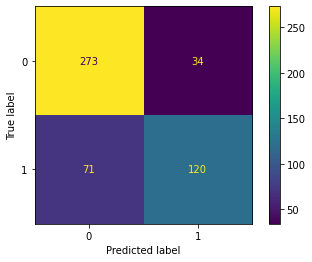

In [71]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm10,
                          display_labels=knn10.classes_)
disp.plot();

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support

In [72]:
print(classification_report(y_train, y_pred_10))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       307
           1       0.78      0.63      0.70       191

    accuracy                           0.79       498
   macro avg       0.79      0.76      0.77       498
weighted avg       0.79      0.79      0.78       498



In [151]:
count_scores(cm10, 'KNN-10')

,Score Name,KNN-10
0,Accuracy,0.79
1,True Positive Rate /Recall,0.63
2,False Positive Rate,0.11
3,True Negative Rate,0.89
4,False Negative Rate,0.37
5,Precision,0.78
6,F1 Score,0.70
7,Support Positive,191.00
8,Support Negative,307.00


In [152]:
values10 = count_scores(cm10, 'KNN-10').iloc[:, 1]

In [153]:
values10

0      0.79
1      0.63
2      0.11
3      0.89
4      0.37
5      0.78
6      0.70
7    191.00
8    307.00
Name: KNN-10, dtype: float64

## k=20

Run through steps 2-4 setting ***```k = 20```***

In [84]:
knn20 = KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [85]:
knn20.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [86]:
#predition
y_pred_20 = knn20.predict(X_train)

In [87]:
pd.DataFrame(y_pred_20, y_train).T

survived,0,1,0,1,1,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,1
0,0,1,0,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [88]:
#estimate probability
y_pred_proba_20 = knn20.predict_proba(X_train)
pd.DataFrame(y_pred_proba, columns=[1, 0]).T

,0,1,2,3,4,5,6,7,8,9,...,488,489,490,491,492,493,494,495,496,497
1,1.0,0.6,0.8,0.0,0.4,0.6,0.8,0.8,1.0,1.0,...,0.8,0.2,0.2,1.0,0.4,1.0,0.8,0.8,0.4,0.8
0,0.0,0.4,0.2,1.0,0.6,0.4,0.2,0.2,0.0,0.0,...,0.2,0.8,0.8,0.0,0.6,0.0,0.2,0.2,0.6,0.2


**Evaluate model**

In [89]:
cm20 = confusion_matrix(y_train, y_pred_20, labels=knn20.classes_)

In [90]:
cm20

array([[265,  42],
       [ 83, 108]])

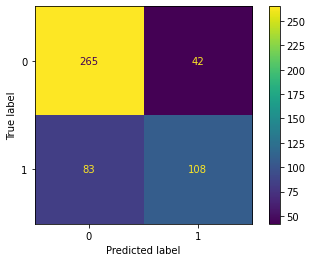

In [91]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm20,
                          display_labels=knn20.classes_)
disp.plot();

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support

In [92]:
print(classification_report(y_train, y_pred_20))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       307
           1       0.72      0.57      0.63       191

    accuracy                           0.75       498
   macro avg       0.74      0.71      0.72       498
weighted avg       0.75      0.75      0.74       498



In [154]:
count_scores(cm20, 'KNN-20')

,Score Name,KNN-20
0,Accuracy,0.75
1,True Positive Rate /Recall,0.57
2,False Positive Rate,0.14
3,True Negative Rate,0.86
4,False Negative Rate,0.43
5,Precision,0.72
6,F1 Score,0.64
7,Support Positive,191.00
8,Support Negative,307.00


In [155]:
value20 = count_scores(cm20, 'KNN-20').iloc[:, 1]
value20

0      0.75
1      0.57
2      0.14
3      0.86
4      0.43
5      0.72
6      0.64
7    191.00
8    307.00
Name: KNN-20, dtype: float64

### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [156]:
pd.DataFrame({'Score Name': rates, 'KNN-5':values, 'KNN-10':values10, 'KNN-20':values20})

,Score Name,KNN-5,KNN-10,KNN-20
0,Accuracy,0.82,0.79,0.75
1,True Positive Rate /Recall,0.73,0.63,0.57
2,False Positive Rate,0.12,0.11,0.14
3,True Negative Rate,0.88,0.89,0.86
4,False Negative Rate,0.27,0.37,0.43
5,Precision,0.79,0.78,0.72
6,F1 Score,0.76,0.70,0.64
7,Support Positive,191.00,191.00,191.00
8,Support Negative,307.00,307.00,307.00


*KNN with 5 neighbors shows the best results on the in-sample data, because 5 neighbors doesn't 'distact' the algorithm with extra neighbors*

### Which model performs best on our out-of-sample data from validate?

In [99]:
pred_5 = knn5.predict(X_validate)
pred_10 = knn10.predict(X_validate)
pred_20 = knn20.predict(X_validate)
valid = [pred_5, pred_10, pred_20]

In [159]:
df

,Score Name,KNN-5,KNN-10,KNN-20,KNN-5-VAL,KNN-10-VAL,KNN-20-VAL
0,Accuracy,0.82,0.79,0.75,0.76,0.72,0.71
1,True Positive Rate /Recall,0.73,0.63,0.57,0.62,0.52,0.54
2,False Positive Rate,0.12,0.11,0.14,0.16,0.15,0.17
3,True Negative Rate,0.88,0.89,0.86,0.84,0.85,0.83
4,False Negative Rate,0.27,0.37,0.43,0.38,0.48,0.46
5,Precision,0.79,0.78,0.72,0.71,0.68,0.66
6,F1 Score,0.76,0.70,0.64,0.66,0.59,0.59
7,Support Positive,191.00,191.00,191.00,82.00,82.00,82.00
8,Support Negative,307.00,307.00,307.00,132.00,132.00,132.00


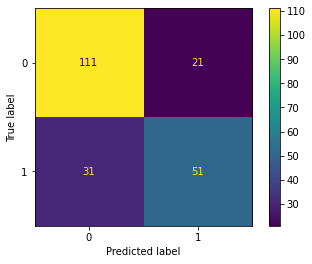

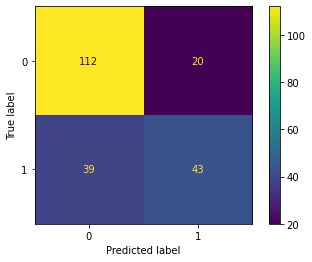

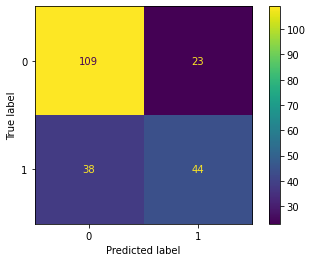

In [182]:
df = pd.DataFrame({'Score Name': rates, 'KNN-5':values, 'KNN-10':values10, 'KNN-20':values20})
df1 = pd.DataFrame()

for i in zip([5, 10, 20], valid):
    
    name = 'KNN-' + str(i[0])
    name_val = 'KNN-' + str(i[0]) + '-VAL'
    #print(name)
    conf_martix = confusion_matrix(y_validate, i[1])
    display_cm(conf_martix)
    
    scores = count_scores(conf_martix, name_val)
    df[name_val] = scores.loc[:, name_val]
    df1['difference-'+name] = abs(df[name_val] - df[name])

In [184]:
col = df.columns.tolist()

In [185]:
col

['Score Name',
 'KNN-5',
 'KNN-10',
 'KNN-20',
 'KNN-5-VAL',
 'KNN-10-VAL',
 'KNN-20-VAL']

In [193]:
df1.index = df['Score Name'].tolist()

In [194]:
df1

,difference-KNN-5,difference-KNN-10,difference-KNN-20
Accuracy,0.06,0.07,0.04
True Positive Rate /Recall,0.11,0.11,0.03
False Positive Rate,0.04,0.04,0.03
True Negative Rate,0.04,0.04,0.03
False Negative Rate,0.11,0.11,0.03
Precision,0.08,0.10,0.06
F1 Score,0.10,0.11,0.05
Support Positive,109.00,109.00,109.00
Support Negative,175.00,175.00,175.00


In [10]:
#Evaluate 2nd way through graphing
k_range = range(1, 20)
train_scores = []
validate_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    validate_scores.append(knn.score(X_validate, y_validate))

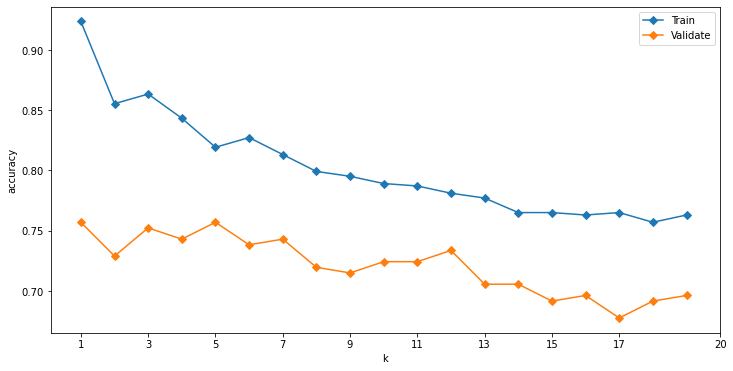

In [14]:
plt.figure(figsize = (12, 6))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_scores, marker = 'D', label='Train')
plt.plot(k_range, validate_scores, marker = 'D', label='Validate')
plt.legend()
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 20])
plt.show()

## *Functions*

In [147]:
#works, don't modify
def count_scores(confusion_matrix, model_name_str):
    '''
    returns a dataframe with scores of the model performing
    '''
    TN, FP, FN, TP = confusion_matrix.ravel()
    ALL = TP + FP + FN + TN

    accuracy = round((TP + TN)/ALL, 2)
    true_positive_rate = sensitivity = recall = power = round(TP/(TP+FN), 2)
    false_positive_rate = false_alarm_ratio = fallout = round(FP/(FP+TN), 2)
    true_negative_rate = specificity = selectivity = round(TN/(TN+FP), 2)
    false_negative_rate = miss_rate = round(FN/(FN+TP), 2)
    precision = PPV = round(TP/(TP+FP), 2)
    f1_score = round(2*(precision*recall)/(precision+recall), 2)
    support_pos = int(TP + FN)
    support_neg = int(FP + TN)
    
    rates = ['Accuracy', 
         'True Positive Rate /Recall', 
         'False Positive Rate', 
         'True Negative Rate', 
         'False Negative Rate',
         'Precision', 
         'F1 Score',
         'Support Positive',
         'Support Negative']
    scores = pd.Series([accuracy, true_positive_rate, false_positive_rate, true_negative_rate, 
                        false_negative_rate, precision, f1_score, support_pos, support_neg])
    
    return pd.DataFrame({'Score Name':rates, model_name_str:scores})

In [164]:
def display_cm(confusion_matrix):
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_martix)
    disp.plot()